In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
import sys
import matplotlib.pyplot as plt
import logging

import numpy as np
import random
import shoji
import loompy

import cytograph as cg
import cytograph.plotting as cgplot

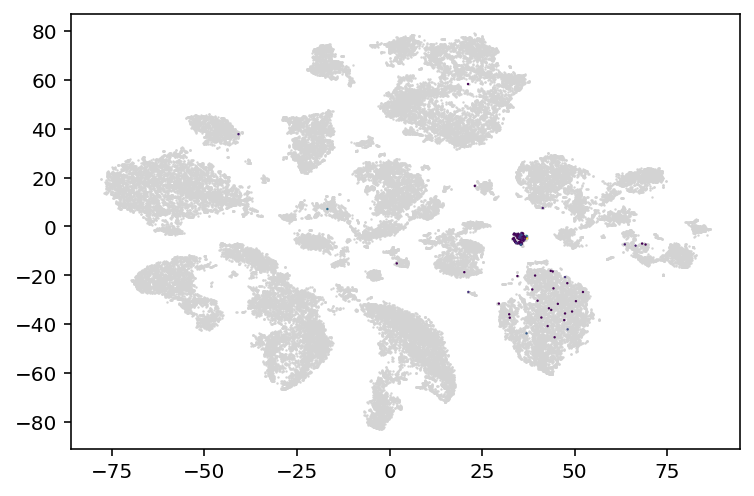

In [28]:
with loompy.connect("/Users/stelin/Dropbox (Linnarsson Group)/linnarsson group/Projects/Oncolytic virotherapy/Brain tumor data/GBM_Bhaduri_Kriegstein_CellStemCell_2019/GBM_Bhaduri.loom") as ds:
    cgplot.scattern(ds.ca.TSNE, c=ds[ds.ra.Gene == "TRBC1", :][0])

In [2]:
db = shoji.connect()
#db.refdb.human_development_agg._from_loom("/Users/stelin/cytograph/20200702_human_dev/data/Allbrain.agg.loom", fix_expression_dtype=True)

In [94]:
ws = db.builds.gbm.GBM
#ws = db.samples.TenX101_1
#ws = db.builds.mousedev.Mousedev

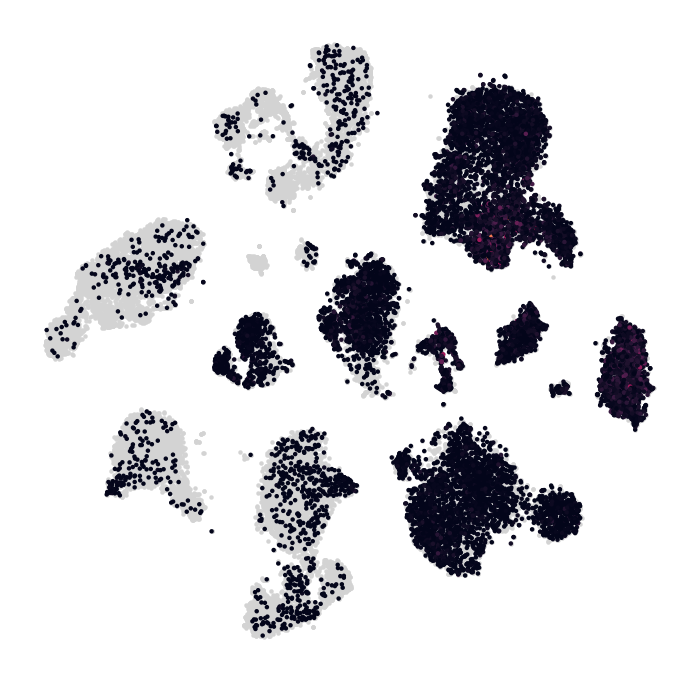

In [98]:
xy = ws.Embedding[...]
#x = ws.Expression[...]
#genes = ws.Gene[...]
#xy = ws.GLMPCAFactors[...]
plt.figure(figsize=(6,6))
#cgplot.scatterc(xy[:, :], c=ws.Clusters[...], s=5, legend=None)
cgplot.scattern(xy[:, :], c=x[:, genes == "ITGB8"].T[0], s=5)
#cgplot.scattern(xy[:, :], c=ws.Factors[...][:, 3], s=5)
plt.axis("off")
None

In [16]:
import numpy as np
row=np.zeros((10,10))
row[None, ...]
tuple(int(x) for x in row.shape)

(10, 10)

('float32', 2, 0, 'cells', 2, 1700703, 2)
('float32', 2, 0, 'cells', 2, 1700703, 2)
('uint32', 1, 0, 'cells', 1700703)
('uint32', 1, 0, 'cells', 1700703)


(-25.91993627548218, 31.949425792694093, -26.25196828842163, 33.17515363693237)

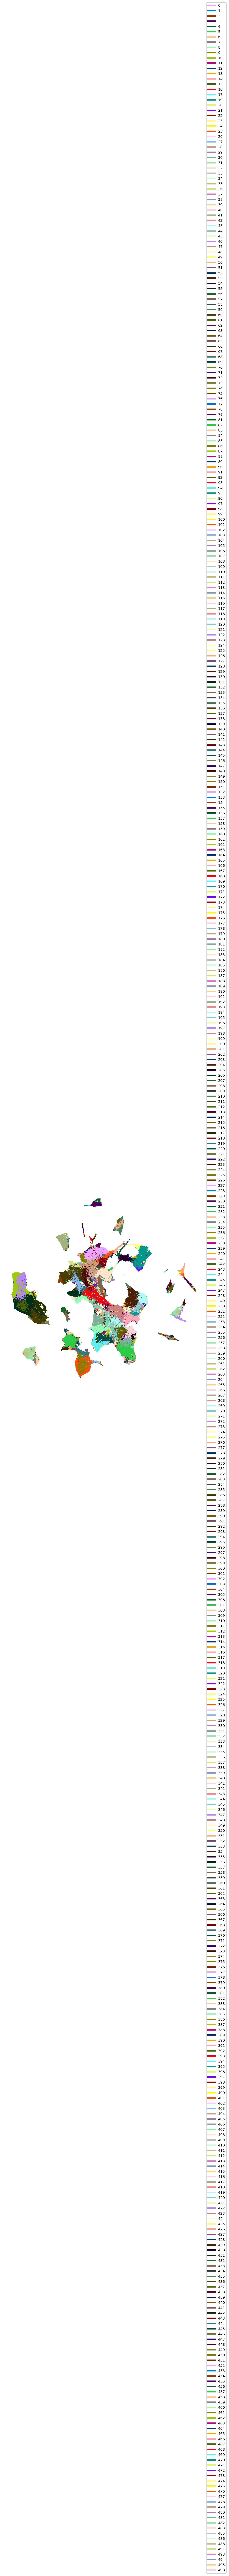

In [11]:
ws = db.builds.humandev.HumanDevAllBrain
plt.figure(figsize=(10,10))
xy = ws.Embedding[...]
cgplot.scatterc(xy,c=ws.Clusters[...],s=5)
plt.axis("off")

In [10]:
ws.ClusterID[...].max()

('uint32', 1, 0, 'clusters', 490)
('uint32', 1, 0, 'clusters', 490)


498

('float32', 2, 0, 'cells', 2, 19502, 2)
('float32', 2, 0, 'cells', 2, 19502, 2)
('uint32', 1, 0, 'cells', 19502)
('uint32', 1, 0, 'cells', 19502)


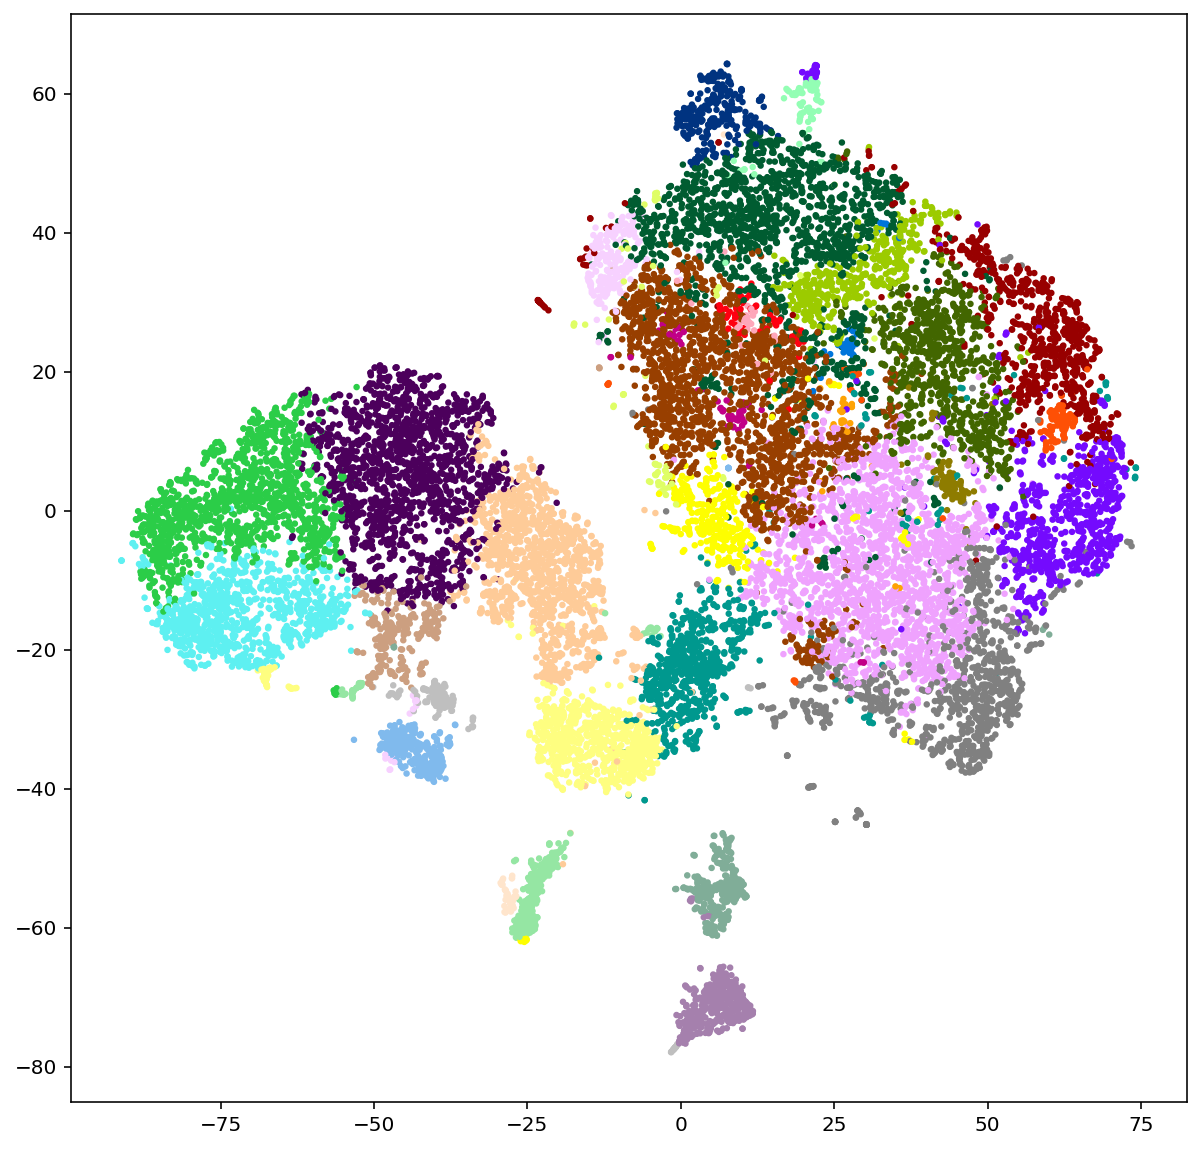

In [6]:
ws = db.builds.humandev.HumanDevAllBrain3
plt.figure(figsize=(10,10))
xy = ws.Embedding[...]
plt.scatter(xy[:,0], xy[:,1],c=cgplot.colorize(ws.Clusters[...]),s=5)

('uint32', 1, 0, 'genes', 33538)
('uint32', 1, 0, 'genes', 33538)
('float32', 1, 0, 'genes', 33538)
('float32', 1, 0, 'genes', 33538)
('bool', 1, 0, 'genes', 33538)
('uint32', 1, 0, 'genes', 33538)
('bool', 1, 0, 'genes', 33538)
('bool', 1, 0, 'genes', 33538)
('float32', 1, 0, 'genes', 33538)
('bool', 1, 0, 'genes', 33538)
('bool', 1, 0, 'genes', 33538)


(0.01, 100)

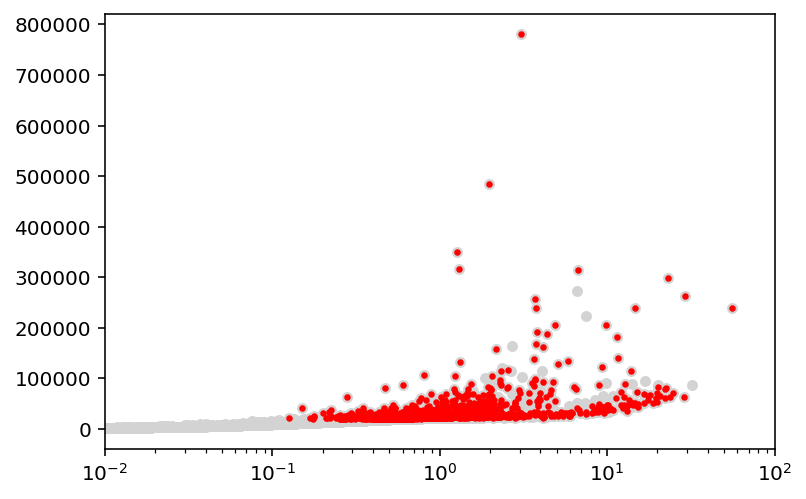

In [7]:
plt.scatter(ws.GeneTotalUMIs[...] / ws.cells.length, ws.Deviance[...], s=20, c="lightgrey")
view = ws[ws.SelectedFeatures == True, ...]
plt.scatter(view.GeneTotalUMIs / ws.cells.length, view.Deviance, s=5, c="red")
plt.xscale("log")
plt.xlim(0.01, 100)

In [5]:
ws = db.builds.humandev.HumanDevAllBrain3
ws.Expression

('uint16', 2, 4, 'cells', 'genes', 19502, 33538, 1, 500)


<Tensor Expression dtype='uint16' dims=('cells', 'genes'), shape=(19502, 33538)>

In [21]:
import inspect

def get_decorators(function):
    """Returns list of decorators names

    Args:
        function (Callable): decorated method/function

    Return:
        List of decorators as strings

    Example:
        Given:

        @my_decorator
        @another_decorator
        def decorated_function():
            pass

        >>> get_decorators(decorated_function)
        ['@my_decorator', '@another_decorator']

    """
    source = inspect.getsource(function)
    index = source.find("def ")
    return [
        line.strip()
        for line in source[:index].strip().splitlines()
        if line.strip()[0] == "@"
    ]

In [23]:
get_decorators(cg.GeneSummaryStatistics.fit)

['@requires("Expression", "uint16", ("cells", "genes"))',
 '@creates("MeanExpression", "float32", ("genes",))',
 '@creates("StdevExpression", "float32", ("genes",))',
 '@creates("Nonzeros", "uint32", ("genes",))',
 '@creates("GeneTotalUMIs", "uint32", ("genes",))',
 '@creates("ValidGenes", "bool", ("genes",))']

In [32]:
ws = db.refdb.mouse_development
cc = ws.CellCycle[...]
pa = ws.PseudoAge[...]

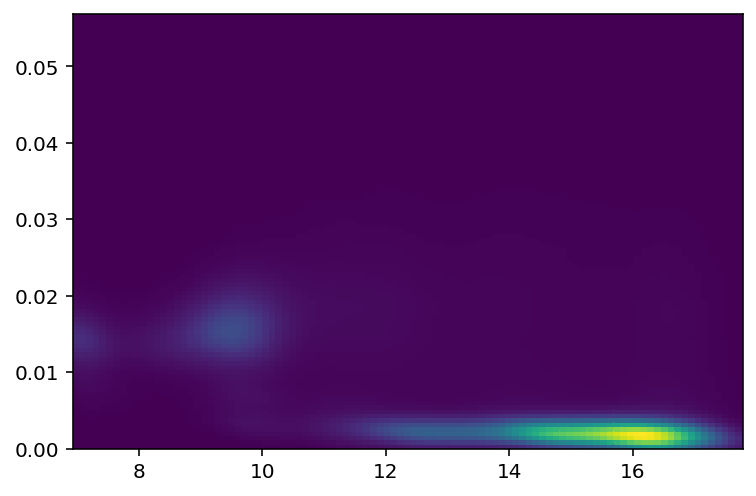

In [158]:
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
from scipy.stats import kde
nbins=100
k = kde.gaussian_kde([pa, cc])
xi, yi = np.mgrid[pa.min():pa.max():nbins*1j, cc.min():cc.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Cell cycle score\n(fraction of UMIs)')

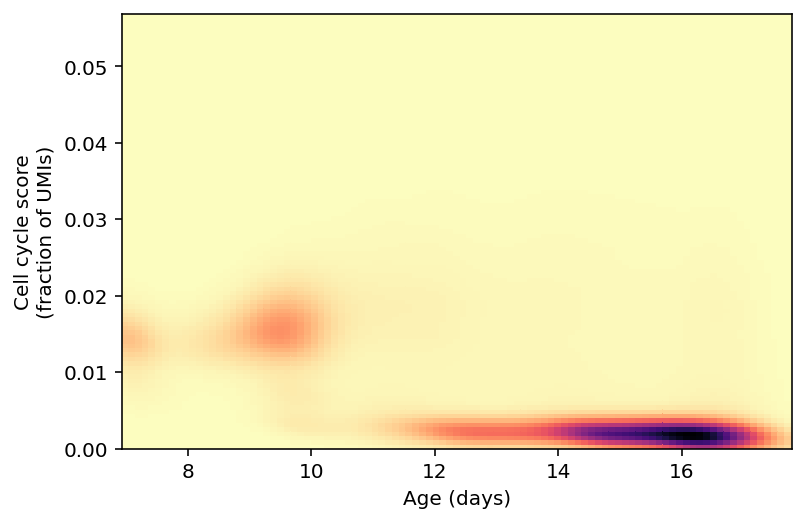

In [165]:
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma_r)
plt.xlabel("Age (days)")
plt.ylabel("Cell cycle score\n(fraction of UMIs)")

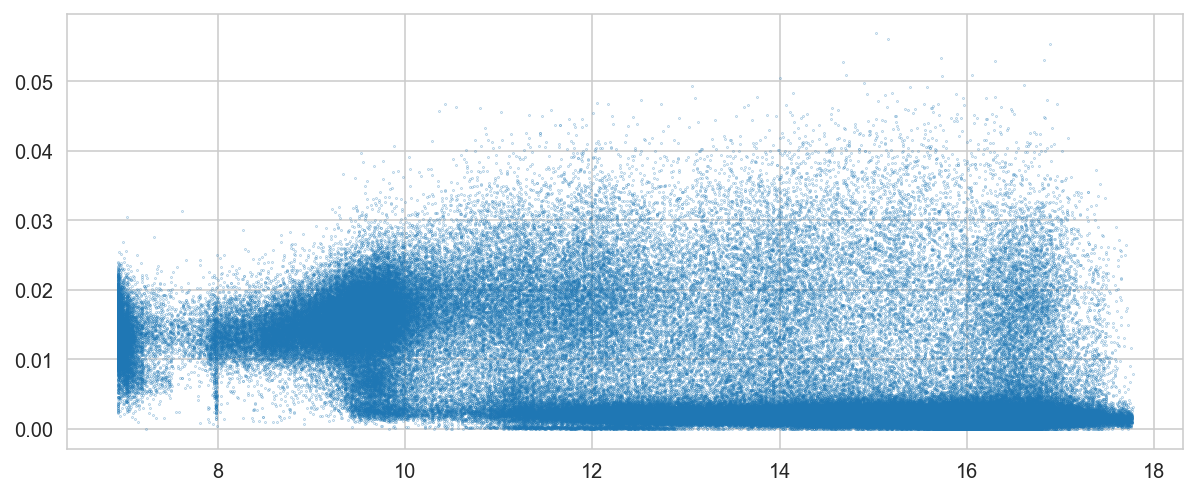

In [60]:
plt.figure(figsize=(10,4))
plt.scatter(pa, cc, s=0.02)

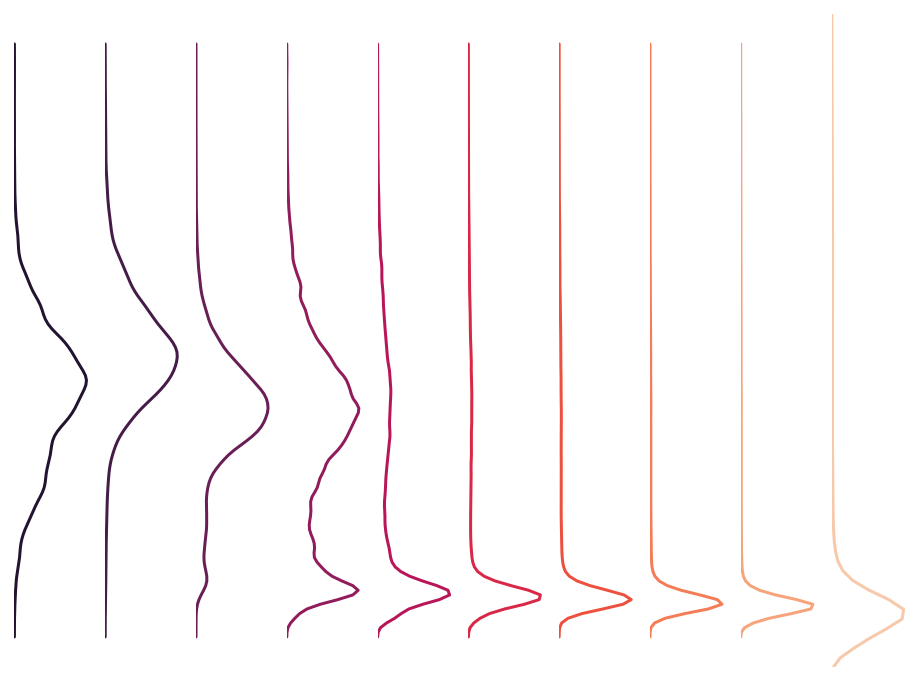

In [59]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
palette = sns.color_palette("rocket", 10)
for ix in range(7, 17):
    plt.subplot(1,10,ix - 6)
    ax = sns.kdeplot(100*cc[(pa > ix)&(pa<=ix+1)], bw=0.05, color=palette[ix - 7], vertical=True)
    if ix == 7:
        ax.set(ylabel='Cell cycle gene expression\n(% UMIs)')
    plt.xticks(())
    plt.yticks(())
    plt.axis("off")
plt.ylim(-0.1, 3)
None

In [2]:
import sfaira

In [7]:
from sfaira.data.human.brain.human_brain_2017_DroNcSeq_habib_001 import Dataset

In [9]:
ds = Dataset()

In [12]:
ds.load()